# Setup

In [1]:
import pandas as pd
from shanwilpy.figure import swfig
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import time

## Pre-processing 

# 1. Change filename for master data 

In [2]:
# CHANGE FILENAME HERE for the most recent data processed
df = pd.read_excel('TILTMETER DATA 2_1_19.xlsx')
df.index = df["TIMESTAMP"] # assign index based on timestamp

# Get index of last element in master file
print("Last time recorded: " + str(df["TIMESTAMP"].iloc[-1]))

Last time recorded: 2019-08-08 10:00:00


# 2. Change filename for new data here

In [3]:
# CHANGE FILENAME HERE for NEW tiltmeter data
new_data = pd.read_csv("new network boo_2019-02-01_2019-08-08.csv", sep=",", skiprows=3)

In [4]:
new_data.rename(columns={'Unnamed: 0' : 'TIMESTAMP', 'Unnamed: 1' : 'GEONET RECORD', 'Degrees' : '1848117_AxisA_1 (Degrees)', \
                   'Degrees.1' : '1848117_AxisB_1 (Degrees)', 'degreesC' : '1848117_MEMSTherm1'}, inplace = True)
new_data["TIMESTAMP"] = pd.to_datetime(new_data["TIMESTAMP"])
new_data.index = new_data["TIMESTAMP"]

## Merge master dataset with new dataset

In [5]:
df = new_data.set_index(["TIMESTAMP"]).combine_first(df.set_index(["TIMESTAMP"])).reset_index()
df.index = df["TIMESTAMP"] 
print("Last time recorded after update: " + str(df["TIMESTAMP"].iloc[-1]))

Last time recorded after update: 2019-08-08 11:00:00


## Omit Outliers

In [6]:
# view outliers 
outlier = df[df["1848117_AxisA_1 (Degrees)"] == 0]
outlier = df[df["1848117_AxisB_1 (Degrees)"] == 0]

# Clip outliers
df = df[df["1848117_AxisA_1 (Degrees)"] != 0]
df = df[df["1848117_AxisB_1 (Degrees)"] != 0]

print("OMITTED DATAPOINTS")
print(outlier)
# outlier.to_excel('omitted_datapoints_8_12_19.xlsx', index = False)

OMITTED DATAPOINTS
                              TIMESTAMP  GEONET RECORD  \
TIMESTAMP                                                
2019-02-28 16:00:00 2019-02-28 16:00:00          664.0   
2019-03-01 15:00:00 2019-03-01 15:00:00          687.0   
2019-03-16 15:00:00 2019-03-16 15:00:00         1046.0   
2019-03-16 16:00:00 2019-03-16 16:00:00         1047.0   
2019-03-16 17:00:00 2019-03-16 17:00:00         1048.0   
2019-03-19 15:00:00 2019-03-19 15:00:00         1118.0   
2019-03-19 16:00:00 2019-03-19 16:00:00         1119.0   
2019-03-19 17:00:00 2019-03-19 17:00:00         1120.0   
2019-03-30 15:00:00 2019-03-30 15:00:00         1382.0   
2019-03-30 16:00:00 2019-03-30 16:00:00         1383.0   
2019-03-31 15:00:00 2019-03-31 15:00:00         1406.0   
2019-03-31 16:00:00 2019-03-31 16:00:00         1407.0   
2019-04-07 16:00:00 2019-04-07 16:00:00         1575.0   
2019-04-07 17:00:00 2019-04-07 17:00:00         1576.0   
2019-04-08 14:00:00 2019-04-08 14:00:00         1597.

# 3. Update date here for new master file

In [7]:
# Save new master file
# CHANGE DATE HERE
df.to_excel('TILTMETER DATA 8_12_19.xlsx', index = False)

## Define A-axis and B-axis columns

In [8]:
df['A-Axis Tilt Change'] = df['1848117_AxisA_1 (Degrees)'].loc['2019-01-30':]
df['B-Axis Tilt Change'] = df['1848117_AxisB_1 (Degrees)'].loc['2019-01-30':]

## Temperature Correction

In [9]:
df["A-Axis Tilt Change"] = 1.01720 * (df['1848117_AxisA_1 (Degrees)'] - (-1.807)) \
+ -0.0003 * (df['1848117_MEMSTherm1'] - 13.526)

df["B-Axis Tilt Change"] = 1.01427 * (df['1848117_AxisB_1 (Degrees)'] - (-0.121)) \
+ -0.0003 * (df['1848117_MEMSTherm1'] - 13.526)

## Plot tiltmeter data and display graph

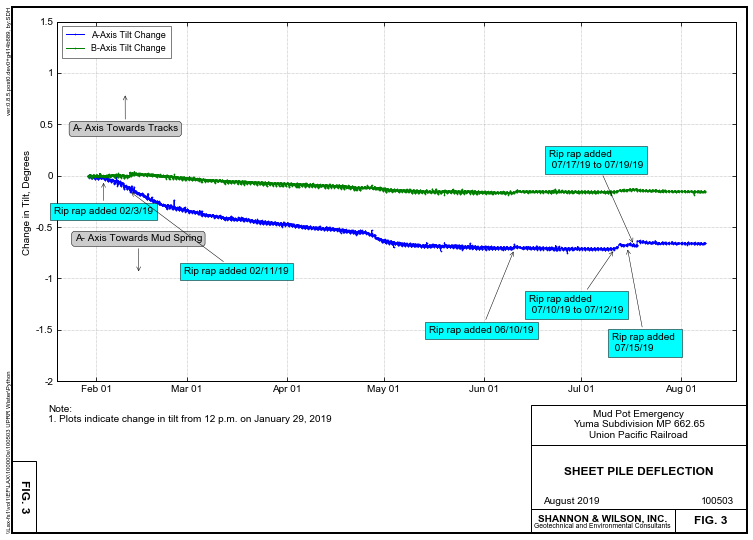

In [10]:
# Setup figure
fig = swfig(paper='letter',
            orient='landscape', 
            project=['Mud Pot Emergency', 'Yuma Subdivision MP 662.65', 'Union Pacific Railroad'],
            figname=['Sheet Pile Deflection'],
            fignum=3,
            projectno="100503",
            date=(time.strftime("%B %Y")))

ax = fig.add_subplot(111)

ax.plot_date(df.index, df['A-Axis Tilt Change'], color = 'blue', marker = '.', \
             markersize = 3, label='A-Axis Tilt Change', ls = 'solid')

ax.plot_date(df.index, df['B-Axis Tilt Change'], color = 'green', marker = '.', \
             markersize = 3, label='B-Axis Tilt Change', ls = 'solid')

# Setting limits
ax.legend(loc=2)

ax.set_ylim(-2, 1.5)
ax.set_ylabel('Change in Tilt, Degrees ')
myFmt = mdates.DateFormatter('%b %d')
#myFmt = mdates.DateFormatter('%b %d %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

fig.note(['Plots indicate change in tilt from 12 p.m. on January 29, 2019'])

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")


### ANNOTATIONS
# A-Axis
ax.annotate('A- Axis Towards Tracks', xy=(0.10, 0.80), xycoords='axes fraction',
             xytext=(-53, -40), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax.annotate('A- Axis Towards Mud Spring', xy=(0.12, 0.3), xycoords='axes fraction',
             xytext=(-64, 30), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

# RIP RAP
ax.annotate('Rip rap added 02/3/19', 
             xy=('2019-02-03 07:00:00', -0.05), xycoords='data',
             xytext=(-50,-35), textcoords='offset points',
             ha="left", va="bottom",
             bbox=dict(fc="cyan"),
             arrowprops=arrow_args)

ax.annotate('Rip rap added 02/11/19', 
             xy=('2/11/2019 07:00', -0.15), xycoords='data',
             xytext=(55,-85), textcoords='offset points',
             ha="left", va="bottom",
             bbox=dict(fc="cyan"),
             arrowprops=arrow_args)

ax.annotate('Rip rap added 06/10/19', 
             xy=('6/10/2019 09:00', -0.72), xycoords='data',
             xytext=(-85,-85), textcoords='offset points',
             ha="left", va="bottom",
             bbox=dict(fc="cyan"),
             arrowprops=arrow_args)

ax.annotate('Rip rap added \n 07/10/19 to 07/12/19', 
             xy=('7/11/2019 09:00', -0.72), xycoords='data',
             xytext=(-85,-65), textcoords='offset points',
             ha="left", va="bottom",
             bbox=dict(fc="cyan"),
             arrowprops=arrow_args)

ax.annotate('Rip rap added \n 07/15/19', 
             xy=('7/15/2019 09:00', -0.7), xycoords='data',
             xytext=(-15,-105), textcoords='offset points',
             ha="left", va="bottom",
             bbox=dict(fc="cyan"),
             arrowprops=arrow_args)

ax.annotate('Rip rap added \n 07/17/19 to 07/19/19', 
             xy=('7/17/2019 09:00', -0.67), xycoords='data',
             xytext=(-85,75), textcoords='offset points',
             ha="left", va="bottom",
             bbox=dict(fc="cyan"),
             arrowprops=arrow_args)

fig.tight_layout()

# 4. Change date here

In [11]:
# Save plot as PDF 
# CHANGE DATE HERE
fig.savefig('fig3_20190812')